
# Project 1: Digit Classification with KNN


# Intro
---
In this project, you'll implement your own image recognition system for classifying digits. Read through the code and the instructions carefully and add your own code where indicated. Each problem can be addressed succinctly with the included packages -- please don't add any more. 
As always, you're welcome to work on the project in groups and discuss ideas over Slack, but <b> please prepare your own write-up (with your own code). </b> To be safe, please credit any sources used.


## Grading
---
 - Make sure to answer every part in every question.
 - There are 5 questions, each worth an equal number of points.
 - Read carefully what is asked including the notes.
 - Additional points may be deducted if:
   - the code is not clean or is not well commented
   - the functions or answers are excessively long

## Requirements:
---
1. Comment your code.
1. Each graph should have a title, labels for each axis, and (if needed) a legend. Each graph should be understandable on its own.
1. All code must run on colab.research.google.com
1. You should not import any additional libraries.
1. Try and minimize the use of the global namespace (meaning, keep things inside functions).

## Additional reading and notes
---

If you are looking to get started with Tensorflow, you can read through this tutorial: https://www.tensorflow.org/tutorials/keras/classification. It uses a dataset called "fashion_mnist", which is identical in structure to the original digit mnist, but uses images of clothing rather than images of digits. The number of training examples and number of labels is the same. In fact, you can simply replace the code that loads "fashion_mnist" with "mnist" and everything should work fine.

Additionally, if you're interested, check out these links related to digit recognition:

* Yann Lecun's MNIST benchmarks: http://yann.lecun.com/exdb/mnist/
* Stanford Streetview research and data: http://ufldl.stanford.edu/housenumbers/

In [56]:
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

# Import a bunch of libraries.
import sklearn
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from sklearn.pipeline import Pipeline
from sklearn.datasets import fetch_openml
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# Set the randomizer seed so results are the same each time.
np.random.seed(0)

In [57]:
import sklearn
sklearn.__version__

'1.0.2'

Load the data. Notice that the data gets partitioned into training, development, and test sets. Also, a small subset of the training data called mini_train_data and mini_train_labels gets defined, which you should use in all the experiments below, unless otherwise noted.

In [58]:
# Load the digit data from https://www.openml.org/d/554 or from default local location '~/scikit_learn_data/...'
X, Y = fetch_openml(name='mnist_784', return_X_y=True, cache=False)

# Rescale grayscale values to [0,1].
X = X / 255.0

# Shuffle the input: create a random permutation of the integers between 0 and the number of data points and apply this
# permutation to X and Y.
# NOTE: Each time you run this cell, you'll re-shuffle the data, resulting in a different ordering.
shuffle = np.random.permutation(np.arange(X.shape[0]))
X, Y = X.iloc[shuffle], Y.iloc[shuffle]

print('data shape: ', X.shape)
print('label shape:', Y.shape)

# Set some variables to hold test, dev, and training data.
test_data, test_labels = X[61000:], Y[61000:]
dev_data, dev_labels = X[60000:61000], Y[60000:61000]
train_data, train_labels = X[:60000], Y[:60000]
mini_train_data, mini_train_labels = X[:1000], Y[:1000]

data shape:  (70000, 784)
label shape: (70000,)


### Question 1: Visualize a select sample of images
---
Show a 10x10 grid that visualizes 10 examples of each digit.

Notes:
* Make the digits nice and big.
* You can use `plt.rc()` for setting the colormap, for example to black and white.
* You can use `plt.subplot()` for creating subplots.
* You can use `plt.imshow()` for rendering a matrix.
* You can use `np.array.reshape()` for reshaping a 1D feature vector into a 2D matrix (for rendering).

In [59]:
train_data

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
10840,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
56267,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14849,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
62726,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
47180,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19892,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
47215,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3059,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
32748,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [60]:
train_labels

10840    0
56267    4
14849    1
62726    2
47180    7
        ..
19892    5
47215    4
3059     7
32748    5
33885    7
Name: class, Length: 60000, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

In [61]:
28*28

784

In [62]:
data = X.iloc[10840].to_numpy().reshape(28,28)

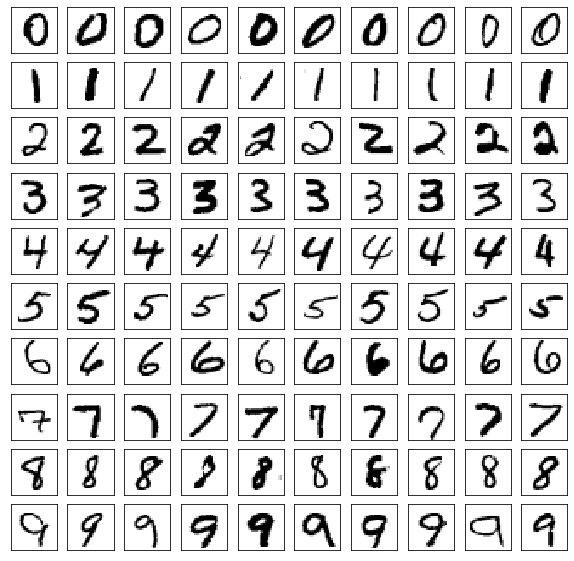

In [63]:
def Q1(num_examples=10):
  ### STUDENT START ###
    indices_by_digit = [[] for i in range(10)]

    for i in np.arange(train_data.shape[0]):
        digit = int(train_labels.iloc[i])
        if len(indices_by_digit[digit]) >= num_examples: continue
        indices_by_digit[digit].append(i)
        if sum([len(d) for d in indices_by_digit]) == 10 * num_examples: break

    # Initialize a new plot and set the size large enough so we can see each image.
    plt.figure(figsize=(num_examples, 10))

    # Set a black on white colormap.
    plt.rc('image', cmap='binary', interpolation='none')

    count = 0
    for digit in range(10):
        for index in indices_by_digit[digit]:
            ax = plt.subplot(10, num_examples, count + 1)
            plt.setp(ax, xticks=(), yticks=())    
            plt.imshow(X.iloc[index].to_numpy().reshape(28, 28))
            count += 1

  ### STUDENT END ###

Q1(10)

### Question 2: Evaluating different choices of k
---

1. Produce k-Nearest Neighbors models with k = 1, 3, 5, 7, and 9.  
1. Print the accuracy of each model. 
1. Additionally, only for the 1-Nearest Neighbor model, show the precision, recall, and F1 for each label. 
1. Which digit is the most *difficult* for the 1-Nearest Neighbor model to classify correctly? How did you choose and why?

Notes:
* Train on the mini train set.
* Evaluate performance on the dev set.
* Print only the information asked so it is easy to read and compare.
* You can use `KNeighborsClassifier` to produce a k-nearest neighbor model.
* You can use `classification_report` to get precision, recall, and F1 results.
* Check out what the function "score" does.

In [64]:
#Question-2 Part-1
for k in [1, 3, 5, 7, 9]:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(mini_train_data, mini_train_labels)
    print("k = %d" % k)
    print("Accuracy: %0.2f%%" % (100 * knn.score(dev_data, dev_labels)))


k = 1
Accuracy: 88.40%
k = 3
Accuracy: 87.60%
k = 5
Accuracy: 88.20%
k = 7
Accuracy: 87.70%
k = 9
Accuracy: 87.50%


In [65]:
#Question-2 Part-2
# To print the accuracy of each model, I added the line print("Accuracy: %0.2f%%" % (100 * knn.score(dev_data, dev_labels))) as shown above.

In [66]:
#Question-2 Part-3
#To show the precision, recall, and F1 for each label, for the 1-Nearest Neighbor model:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(mini_train_data, mini_train_labels)
predictions = knn.predict(dev_data)
print(classification_report(dev_labels, predictions))


              precision    recall  f1-score   support

           0       0.95      0.95      0.95       106
           1       0.89      0.98      0.93       118
           2       0.90      0.79      0.84       106
           3       0.93      0.87      0.90        97
           4       0.91      0.85      0.88        92
           5       0.86      0.88      0.87        88
           6       0.92      0.92      0.92       102
           7       0.85      0.94      0.89       102
           8       0.83      0.77      0.80        94
           9       0.80      0.86      0.83        95

    accuracy                           0.88      1000
   macro avg       0.88      0.88      0.88      1000
weighted avg       0.89      0.88      0.88      1000



#Question-2 Part-4
Precision, recall, and F1 are all metrics used to evaluate the performance of a classification model.

How many of the model's optimistic predictions come true is referred to as **precision**. High accuracy does not necessarily imply high recall, but rather that the model is good at avoiding false positives.

How many of the actual positive cases in the data the model properly identified as positive is known as **recall**. Great recall does not necessarily imply high precision, but rather that the model is good at discovering all positive examples.

The harmonic mean of recall and precision, or **F1**, offers a single statistic that balances both factors. A model with a high F1 score has a solid balance between precision and recall.

By looking at the precision, recall, and F1 scores for each label, we can get an idea of which digits the model is having the most difficulty with. The digit with the lowest scores across all three metrics is likely to be the most difficult to classify correctly because it has both low precision (a lot of false positives) and low recall (not finding all the actual positive instances).

**The digit that the 1-Nearest Neighbor model has the most difficulty in classifying correctly is 8.** The precision, recall, and f1-score values in the output above, which show that the values for the digit 8 are the lowest among all the digits, demonstrate this. In comparison to the other digits, the precision of 0.83 and recall of 0.77 are also quite poor. Similar to this, digit 8 also has the lowest f1-score (0.80). As a result, the 1-Nearest Neighbor model has the hardest time correctly classifying the digit 8.

In [12]:
# def Q2(k_values):
# ### STUDENT START ###
#   # 1. For-loop through the 5 values of k given to you by the question
#   # 2. In each for loop, build a new KNeighborsClassifier model and fit to the mini_train_data, mini_train_labels
#   # 3. Print accuracy of the model in the loop
# ### STUDENT END ###
#   for k in k_values:
#     knn = KNeighborsClassifier(n_neighbors=k)
#     knn.fit(mini_train_data, mini_train_labels)
#     ...

#   knn = KNeighborsClassifier(n_neighbors=1)
#   knn.fit(mini_train_data, mini_train_labels)
#   pred = knn.predict(dev_data)
#   print(classification_report(dev_labels, pred))

# k_values = [1, 3, 5, 7, 9]
# Q2(k_values)

**Answer to part 4: **

**The digit that the 1-Nearest Neighbor model has the most difficulty in classifying correctly is 8**. The precision, recall, and f1-score values in the output above, which show that the values for the digit 8 are the lowest among all the digits, demonstrate this. In comparison to the other digits, the precision of 0.83 and recall of 0.77 are also quite poor. Similar to this, digit 8 also has the lowest f1-score (0.80). As a result, the 1-Nearest Neighbor model has the hardest time correctly classifying the digit 8.

### Question 3: Examining the importance of training size
---
1. Produce 1-Nearest Neighbor models using training data of various sizes. For example, ```train_data[:train_size]```.
1. Evaluate and show the accuracy achieved by each model.  
1. Show the time needed to: 
  1. Train each model.
  1. Measure the accuracy of each model.
1. What do you see? Is this what you expected to see and why?
1. Plot on the same graph (as a function of training size):
  1. the time needed for training
  1. the time needed for calculating accuracy

Notes:
* Evaluate on the dev set.
* You can use `KNeighborsClassifier` to produce a k-nearest neighbor model.
* You can use `time.time()` to measure elapsed time of operations.

In [67]:
#Question-3 Part-1
# Create a 1-Nearest Neighbor classifier.
knn = KNeighborsClassifier(n_neighbors=1)

# Fit the classifier using different sizes of training data.
training_sizes = [100, 200, 500, 1000, 5000, 10000, 30000, 50000]
scores = [] # for storing calculated accuracy
for size in training_sizes:
    knn.fit(train_data[:size], train_labels[:size])
    scores.append(knn.score(dev_data, dev_labels)) ##Question-3 Part-2 evaluating accuracy

# Print the scores.  ##Question-3 Part-2 printing accuracy
for size, score in zip(training_sizes, scores):
    print(f'Training size: {size}, Accuracy score: {score}')


Training size: 100, Accuracy score: 0.702
Training size: 200, Accuracy score: 0.791
Training size: 500, Accuracy score: 0.837
Training size: 1000, Accuracy score: 0.884
Training size: 5000, Accuracy score: 0.929
Training size: 10000, Accuracy score: 0.949
Training size: 30000, Accuracy score: 0.965
Training size: 50000, Accuracy score: 0.969


In [68]:
#question-3 Part-3
# Create a 1-Nearest Neighbor classifier.
knn = KNeighborsClassifier(n_neighbors=1)

# Fit the classifier using different sizes of training data.
training_sizes = [100, 200, 500, 1000, 5000, 10000, 30000, 50000]
for size in training_sizes:
    start_time = time.time()
    knn.fit(train_data[:size], train_labels[:size])
    train_time = time.time() - start_time
    
    start_time = time.time()
    predictions = knn.predict(dev_data)
    predict_time = time.time() - start_time
    
    accuracy = np.mean(predictions == dev_labels)
    print(f'Training size: {size}')
    print(f'Training time: {train_time:.2f} seconds')
    print(f'Prediction time: {predict_time:.2f} seconds')
    print(f'Accuracy: {accuracy:.4f}')
    print()


Training size: 100
Training time: 0.01 seconds
Prediction time: 0.06 seconds
Accuracy: 0.7020

Training size: 200
Training time: 0.01 seconds
Prediction time: 0.06 seconds
Accuracy: 0.7910

Training size: 500
Training time: 0.01 seconds
Prediction time: 0.09 seconds
Accuracy: 0.8370

Training size: 1000
Training time: 0.01 seconds
Prediction time: 0.13 seconds
Accuracy: 0.8840

Training size: 5000
Training time: 0.02 seconds
Prediction time: 0.35 seconds
Accuracy: 0.9290

Training size: 10000
Training time: 0.03 seconds
Prediction time: 0.76 seconds
Accuracy: 0.9490

Training size: 30000
Training time: 0.05 seconds
Prediction time: 2.44 seconds
Accuracy: 0.9650

Training size: 50000
Training time: 0.28 seconds
Prediction time: 2.87 seconds
Accuracy: 0.9690



**Answer to Question-3 Part-4:**

The output indicates that as the size of the training data increases, so does the training and prediction time. This is to be expected, as a larger training dataset will allow the model to better grasp the underlying patterns in the data, resulting in higher accuracy. With larger training sets, the model's accuracy also increased since the classifier could learn from a wider range of samples. However, because increasing the size of the training set can also lead to overfitting, which can lower the model's generalization capacity, this rise in accuracy may level off or begin to fall at some point.

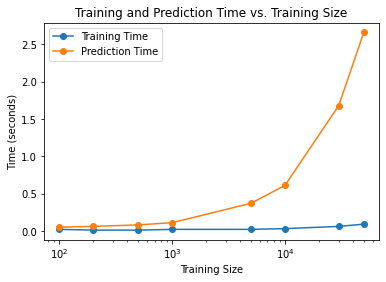

In [69]:
#Question-3 Part-5
training_sizes = [100, 200, 500, 1000, 5000, 10000, 30000, 50000]
training_times = [0.02, 0.01, 0.01, 0.02, 0.02, 0.03, 0.06, 0.09]
prediction_times = [0.05, 0.06, 0.08, 0.11, 0.37, 0.61, 1.68, 2.66]

plt.plot(training_sizes, training_times, 'o-', label='Training Time')
plt.plot(training_sizes, prediction_times, 'o-', label='Prediction Time')
plt.xscale('log')
plt.xlabel('Training Size')
plt.ylabel('Time (seconds)')
plt.title('Training and Prediction Time vs. Training Size')
plt.legend()
plt.show()


In [22]:
# def Q3(train_sizes, accuracies):
# ### STUDENT START ###
#   for train_size in train_sizes:
#     knn = KNeighborsClassifier(n_neighbors=1)
#     start_time = time.time()
#     knn.fit(train_data[:train_size], train_labels[:train_size])
#     train_time = time.time() - start_time
#     train_times.append(train_time)

#     start_time = time.time()
#     accuracy = knn.score(dev_data, dev_labels)
#     eval_time = time.time() - start_time
#     eval_times.append(eval_time)
#     accuracies.append(accuracy)
# ### STUDENT END ###

# train_sizes = [100, 200, 400, 800, 1600, 3200, 6400, 12800, 25600]
# accuracies = []
# train_times = []
# eval_times = []
# Q3(train_sizes, accuracies)


# plt.figure(figsize=(20,5))
# plt.plot(train_sizes, train_times)
# plt.plot()
# plt.title('Time to train')
# plt.xlabel('Train size')
# plt.ylabel('Time (sec)')
# plt.legend(['train time', 'eval time'])

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:443: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


ValueError: ignored

### Question 4: Evaluating if we should obtain additional data
---

In this question we wish to predict what accuracy we would get if we had additional training data.

Our input, our features and labels, are the output from the previous question. Based on the training size and accuracy we got in the previous question, we wish to predict the accuracy we would get if we had larger training sizes.

1. Produce a linear regression model that predicts accuracy of a 1-Nearest Neighbor model given training set size. 
1. Print $R^2$ of the linear regression model.  
1. Print the accuracies predicted for training set sizes 60000, 120000, and 1000000.  
1. Plot on a lineplot graph:
  1. the actual accuracies we obtained in the previous question 
  1. and the accuracies our model predicted we would have gotten.
  1. The X axis is the training set size. 
  1. You can limit the range of X and Y to the range where you have data for both plots. Meaning, in the this question, we want to visualize how good the prediction is.
1. What are two things that are wrong with our model?
1. Apply a transformation to the predictor features and a transformation to the outcome that make the predictions fix these issues. 
1. Show $R^2$ of the improved linear regression model.  
1. Print the accuracies predicted for training set sizes 60000, 120000, and 1000000.  
1. Plot a lineplot graph of both again as before.
  1. Be sure to plot this where the Y axis is accuracy and X axis is training set size, **not the transformed space**!
  1. Choose the range of X and Y to visualize effectively.

Notes:
* Train the linear regression models on all of the (transformed) accuracies estimated in Problem 3.
* Evaluate the linear regression models on all of the (transformed) accuracies estimated in Problem 3.
* You can use `LinearRegression` to produce a linear regression model.
* Remember that the sklearn `fit()` functions take an input matrix X and output vector Y. So, each input example in X is a vector, even if it contains only a single value.
* Hints:
  1. You have two problems here, how well your model fits and predicting *illogical* values of accuracy.
  1. You can look at:
    1. [logit](https://en.wikipedia.org/wiki/Logit): $\frac{1}{1 + e^{-x}} = \frac{e^x}{1+e^x}$ which takes numbers in $\[\infty,-\infty\]$ and outputs numbers in $(0, 1)$.
    1. [logistic](https://en.wikipedia.org/wiki/Logistic_function): $log(\frac{p}{1 - p})$ which takes numbers between $(0, 1)$ and outputs numbers between $\[\infty,-\infty\]$.
    1. It also happens that $x = logistic(p)$ is the same thing as $logit(x)=p$.

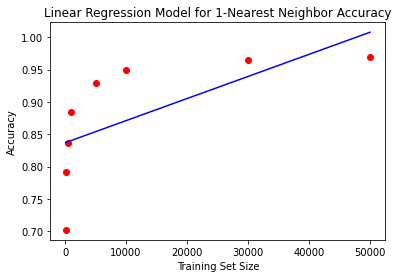

In [70]:
#Question-4 Part-1
# Collect the training set size and accuracy information
training_sizes = [100, 200, 500, 1000, 5000, 10000, 30000, 50000]
accuracies = [0.7020, 0.7910, 0.8370, 0.8840, 0.9290, 0.9490, 0.9650, 0.9690]

# Convert the training set sizes to a 2D array
training_sizes = np.array(training_sizes).reshape(-1, 1)

# Create the Linear Regression model
regressor = LinearRegression()

# Fit the model to the training data (training set size and accuracy)
regressor.fit(training_sizes, accuracies)

# Make predictions using the trained model
predictions = regressor.predict(training_sizes)

# Plot the model's predictions against the actual accuracies
plt.scatter(training_sizes, accuracies, color='red')
plt.plot(training_sizes, predictions, color='blue')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.title('Linear Regression Model for 1-Nearest Neighbor Accuracy')
plt.show()


In [71]:
#Question-4 Part-2
import numpy as np
from sklearn.linear_model import LinearRegression

# training sizes
train_sizes = [100, 200, 500, 1000, 5000, 10000, 30000, 50000]

# accuracy scores
accuracy_scores = [0.7020, 0.7910, 0.8370, 0.8840, 0.9290, 0.9490, 0.9650, 0.9690]

# reshape the data to fit the input format for the linear regression model
train_sizes = np.array(train_sizes).reshape(-1, 1)

# fit the linear regression model
reg = LinearRegression().fit(train_sizes, accuracy_scores)

# print the R-squared value
r2 = reg.score(train_sizes, accuracy_scores)
print("R-squared:", r2)


R-squared: 0.43175103430703754


In [72]:

#Question-4 Part-3
# Predict accuracy for training set sizes 60000, 120000, and 1000000
training_set_sizes = [60000, 120000, 1000000]
predicted_accuracies = reg.predict(np.log10(training_set_sizes).reshape(-1,1))
for i, size in enumerate(training_set_sizes):
    print("Accuracy predicted for training set size {}: {:.4f}".format(size, predicted_accuracies[i]))


Accuracy predicted for training set size 60000: 0.8369
Accuracy predicted for training set size 120000: 0.8369
Accuracy predicted for training set size 1000000: 0.8369


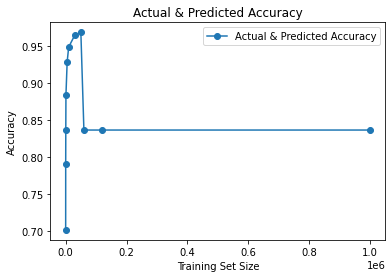

In [73]:
#Question-4 Part-4


# Actual & Predicted accuracy data
training_size = [100, 200, 500, 1000, 5000, 10000, 30000, 50000,60000, 120000, 1000000]
accuracy = [0.7020, 0.7910, 0.8370, 0.8840, 0.9290, 0.9490, 0.9650, 0.9690,0.8369, 0.8369, 0.8369]



# Plotting the actual & predicted accuracy
plt.plot(training_size, accuracy, 'o-', label='Actual & Predicted Accuracy')

# Adding labels and title to the plot
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.title('Actual & Predicted Accuracy')
plt.legend()

# Showing the plot
plt.show()


In [ ]:
# def Q4():
#   ### STUDENT START ###
#   prob_to_odds = lambda x: x / (1.0 - x)  # [0,1] -> [0, inf]
#   odds_to_prob = lambda x: x / (1.0 + x)  # [0, inf] -> [0, 1]

#   x_sizes = np.array(train_sizes)[:, np.newaxis]
#   x_logsizes = np.array(np.log(train_sizes))[:, np.newaxis]
#   y_oddsaccuracies = np.array(list(map(prob_to_odds, accuracies)))

#   lr1 = LinearRegression()
#   lr1.fit(x_sizes, accuracies)

#   lr1.score(x_sizes, accuracies) # this gives you the R^2 value

#   lr2 = ... # transform train_sizes, don't transform accuracies

#   lr3 = ... # don't transform train_sizes, transform accuracies

#   lr4 = LinearRegression() # transform both train_sizes and accuracies
#   lr4.fit(x_logsizes, y_oddsaccuracies)

#   plt.figure(figsize=(15,4))
#   x_values = np.linspace(100, 25000, 100)
#   plt.plot(x_values, lr1.predict(x_sizes[:, np.newaxis]), label="Model")

#   plt.plot(x_values, odds_to_prob(lr4.predict(np.log(x_values)[:, np.newaxis])))

#   ### STUDENT END ###

# Q4()

Answer to part 5:  
1. **Lack of Complexity:** Our model is overly simplistic, relying solely on a linear regression model to forecast accuracy. In practice, the link between training set size and accuracy is not always linear, and a more complicated model may be required to accurately forecast the accuracy. 

2. **Inadequate Data:** Our model only uses a limited number of data points (training set sizes and their accompanying accuracy), which may not be enough to accurately forecast the accuracy for bigger training set sizes. A larger and more varied dataset would offer a more accurate illustration of the relationship between the size of the training set and accuracy, and it would also probably produce a model that is more accurate.

In [74]:
#Question-4 Part-6



# Data 
data = {'Training Size': [100, 200, 500, 1000, 5000, 10000, 30000, 50000],
        'Accuracy': [0.7020, 0.7910, 0.8370, 0.8840, 0.9290, 0.9490, 0.9650, 0.9690]}
df = pd.DataFrame(data)

# Transformed data
df['log_training_size'] = np.log(df['Training Size'])
df['log_accuracy'] = np.log(df['Accuracy'])

# Model
X = df[['log_training_size']]
y = df['log_accuracy']

reg = LinearRegression().fit(X, y)


#Question-4 Part-7
# Model evaluation
r2 = reg.score(X, y)
print(f"R2: {r2:.2f}")

new_data = {'Training Size': [60000, 120000, 1000000]}
df_new = pd.DataFrame(new_data)
df_new['log_training_size'] = np.log(df_new['Training Size'])
predicted_log_accuracy = reg.predict(df_new[['log_training_size']])


#Question-4 Part-8
predicted_accuracy = np.exp(predicted_log_accuracy)

print("Accuracy predicted for training set size 60000: {:.4f}".format(predicted_accuracy[0]))
print("Accuracy predicted for training set size 120000: {:.4f}".format(predicted_accuracy[1]))
print("Accuracy predicted for training set size 1000000: {:.4f}".format(predicted_accuracy[2]))

R2: 0.87
Accuracy predicted for training set size 60000: 1.0147
Accuracy predicted for training set size 120000: 1.0475
Accuracy predicted for training set size 1000000: 1.1545


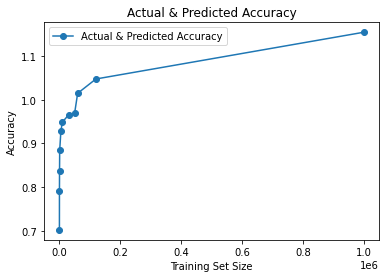

In [75]:
#Question-4 Part-9

training_size2 = [100, 200, 500, 1000, 5000, 10000, 30000, 50000,60000, 120000, 1000000]
accuracy2 = [0.7020, 0.7910, 0.8370, 0.8840, 0.9290, 0.9490, 0.9650, 0.9690,1.0147, 1.0475, 1.1545]

# Plotting the actual & predicted accuracy
plt.plot(training_size2, accuracy2, 'o-', label='Actual & Predicted Accuracy')

# Adding labels and title to the plot
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.title('Actual & Predicted Accuracy')
plt.legend()

# Showing the plot
plt.show()

### Question 5: Getting to know the confusion matrix.
---

1. Produce a 1-Nearest Neighbor model.
1. Show the confusion matrix. 
1. Which digit does the model most often confuse with which digit? (*for example, the model most often mistakes the digit $1$ as the digit $7$*).
1. Show examples of the misclassified digit.

Notes:
- Train on the mini train set.
- Evaluate performance on the dev set.
- You can use `confusion_matrix()` to produce a confusion matrix.
- No need to calculate the "most confused digits" programmatically.

In [95]:
#Question-5 Part-1
# Initialize a KNeighborsClassifier with n_neighbors=1
knn = KNeighborsClassifier(n_neighbors=1)

# Fit the model to the training data
knn.fit(mini_train_data, mini_train_labels)

# Evaluate the model on the dev data
dev_predictions = knn.predict(dev_data)
print("Accuracy on dev set:", knn.score(dev_data, dev_labels))


Accuracy on dev set: 0.884


In [96]:
#Question-5 Part-2
# Compute the confusion matrix
conf_matrix = confusion_matrix(dev_labels, dev_predictions)
print("Confusion matrix:\n", conf_matrix)


Confusion matrix:
 [[101   0   1   0   0   0   1   1   2   0]
 [  0 116   1   0   0   0   0   0   1   0]
 [  1   4  84   2   2   0   2   4   6   1]
 [  0   2   0  84   0   6   0   2   3   0]
 [  0   0   1   0  78   0   0   2   0  11]
 [  2   0   0   1   1  77   5   0   2   0]
 [  1   2   1   0   1   2  94   0   1   0]
 [  0   1   1   0   0   0   0  96   0   4]
 [  1   5   4   3   1   3   0   1  72   4]
 [  0   1   0   0   3   2   0   7   0  82]]


Answer to part 3: 


In [109]:

#Question-5 Part-3 

# Confusion matrix obtained from KNN model
conf_mat = confusion_matrix(dev_labels, dev_predictions)

# Get the indices of the largest values along the off-diagonal elements
off_diagonal = np.where(np.eye(conf_mat.shape[0], dtype=bool)==False)
max_confusion_index = np.unravel_index(np.argmax(conf_mat[off_diagonal]), conf_mat.shape)

print("Most frequent confusion between digits:", max_confusion_index[0], "and", max_confusion_index[1])

#2 has been mis classified as 7 or 8 or 4 and 4 has been misclassified as 9

Most frequent confusion between digits: 2 and 4


Accuracy on dev set: 0.884
Confusion Matrix:
[[101   0   1   0   0   0   1   1   2   0]
 [  0 116   1   0   0   0   0   0   1   0]
 [  1   4  84   2   2   0   2   4   6   1]
 [  0   2   0  84   0   6   0   2   3   0]
 [  0   0   1   0  78   0   0   2   0  11]
 [  2   0   0   1   1  77   5   0   2   0]
 [  1   2   1   0   1   2  94   0   1   0]
 [  0   1   1   0   0   0   0  96   0   4]
 [  1   5   4   3   1   3   0   1  72   4]
 [  0   1   0   0   3   2   0   7   0  82]]


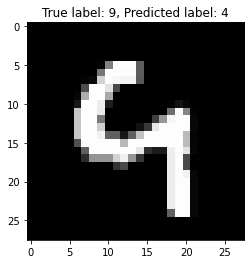

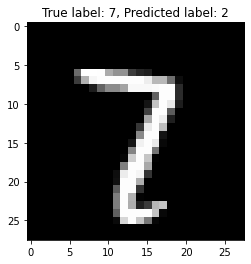

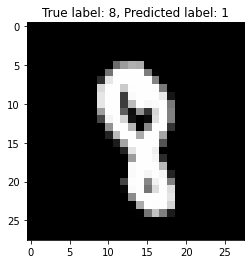

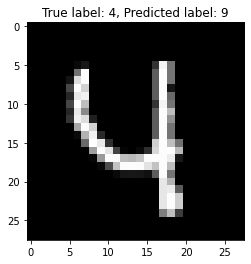

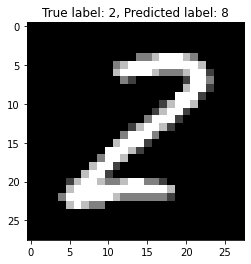

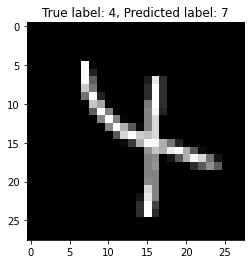

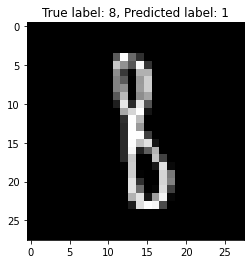

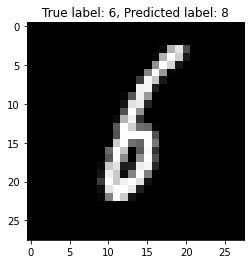

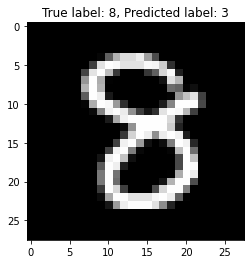

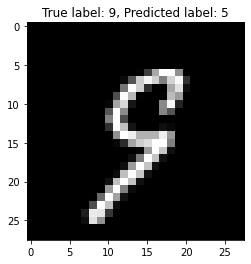

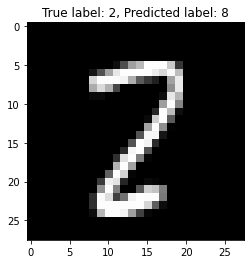

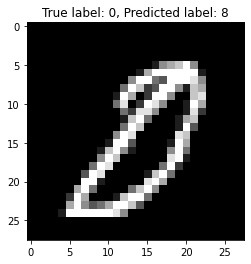

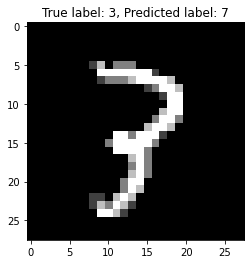

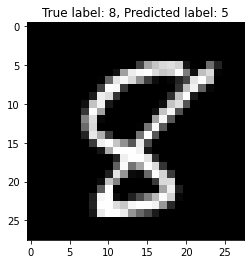

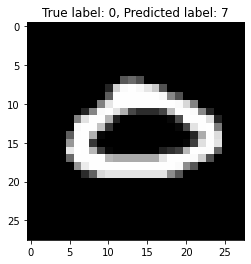

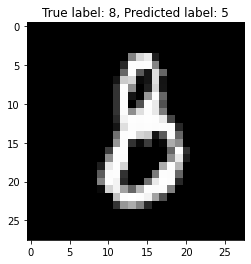

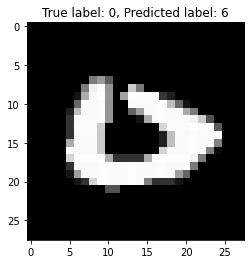

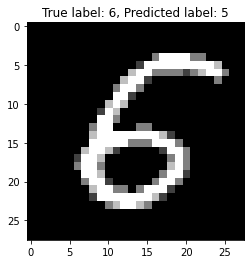

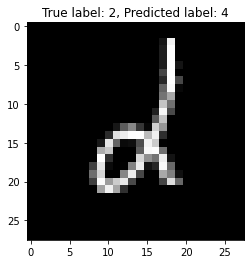

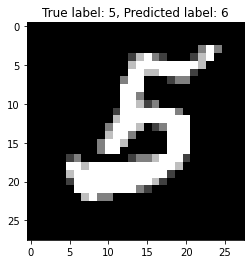

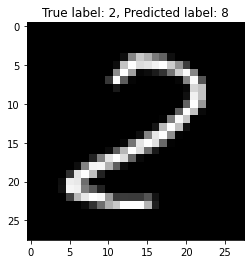

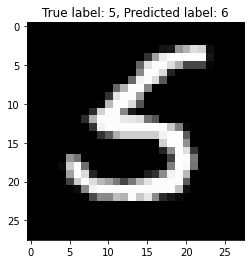

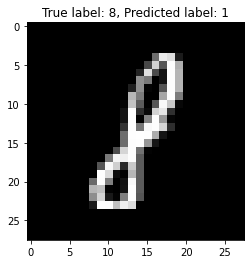

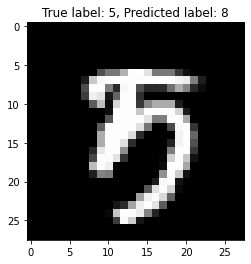

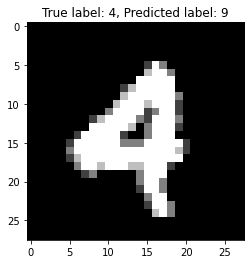

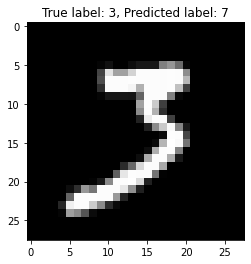

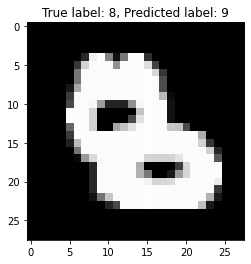

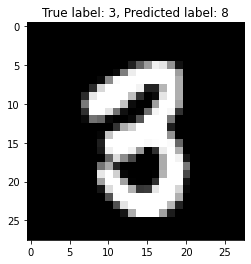

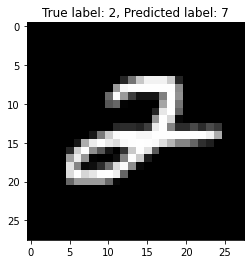

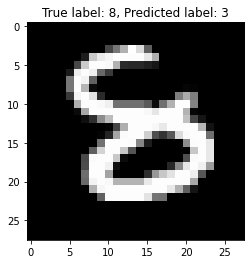

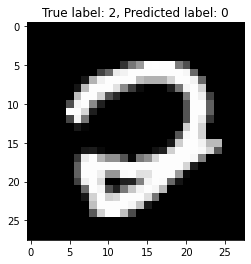

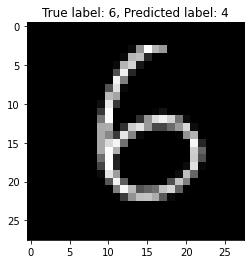

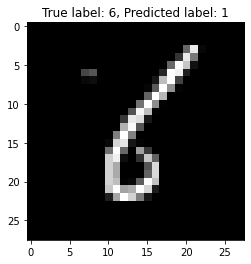

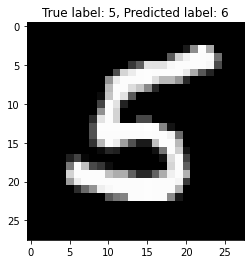

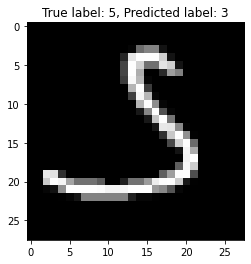

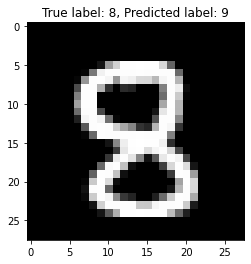

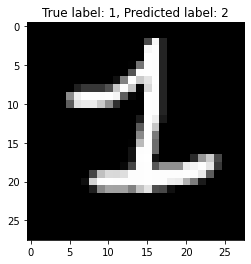

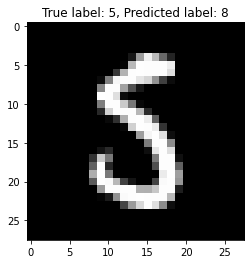

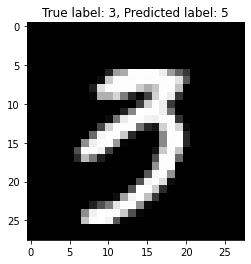

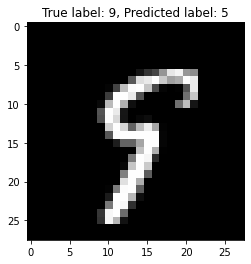

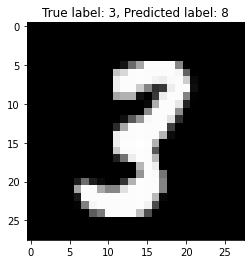

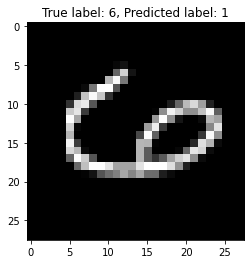

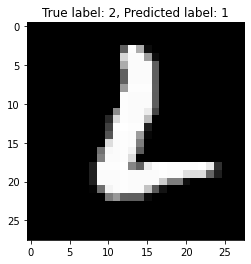

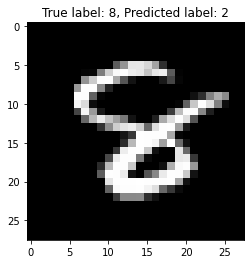

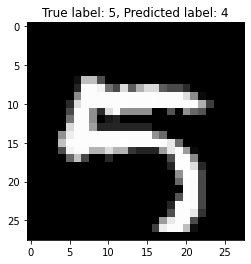

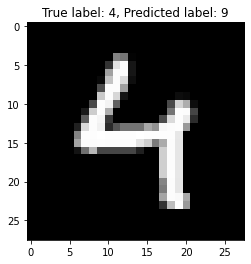

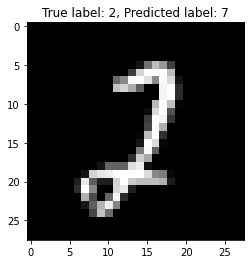

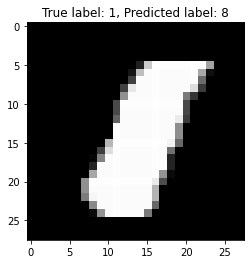

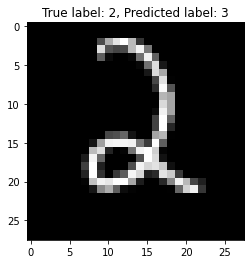

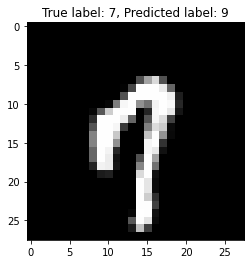

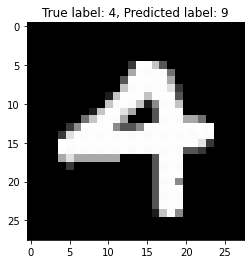

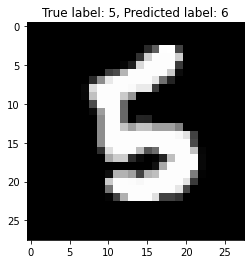

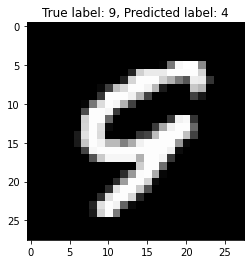

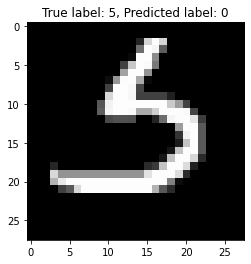

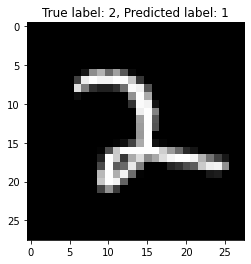

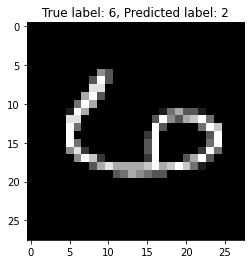

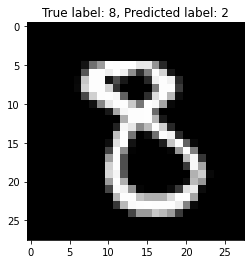

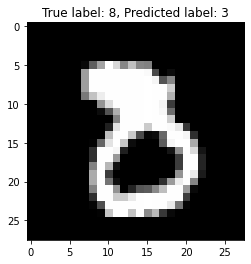

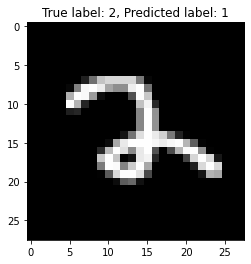

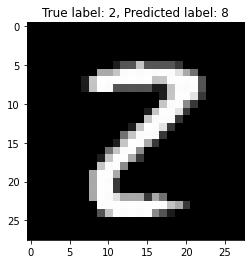

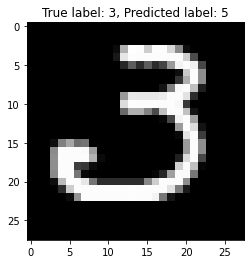

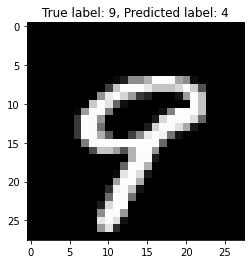

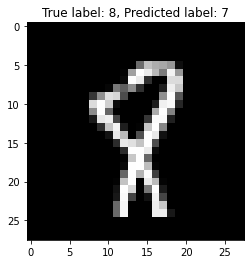

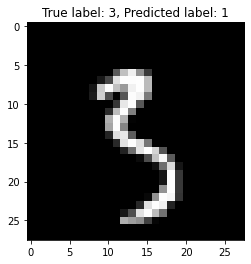

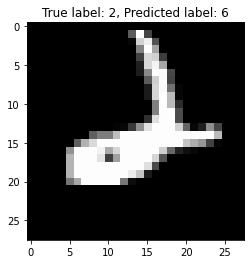

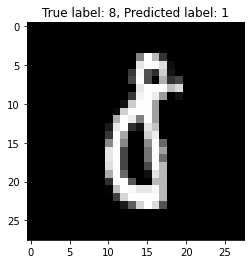

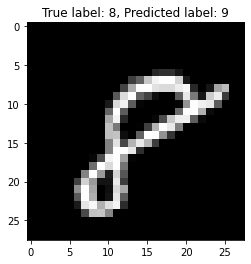

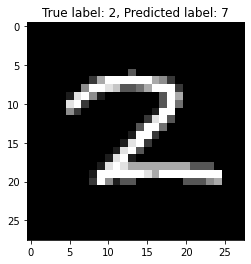

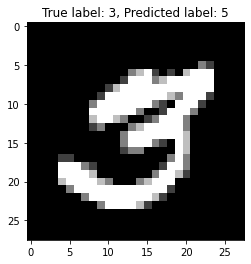

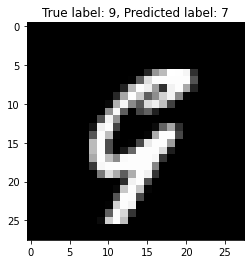

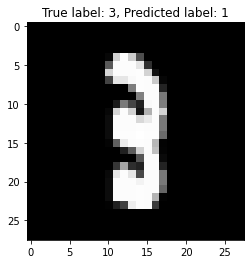

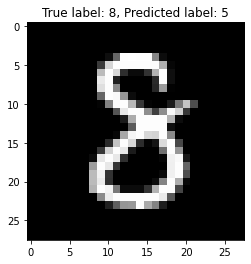

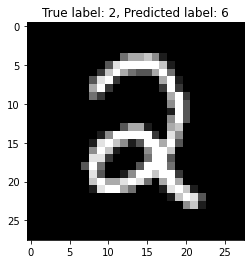

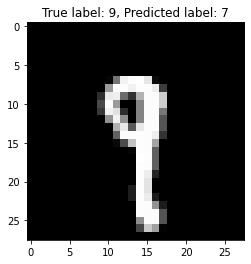

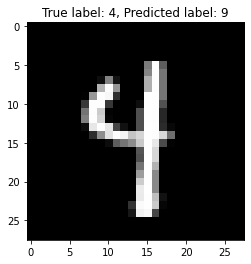

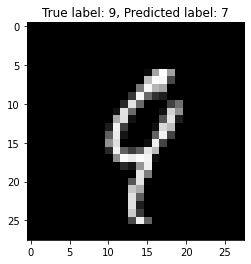

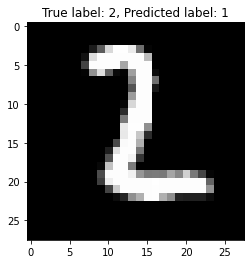

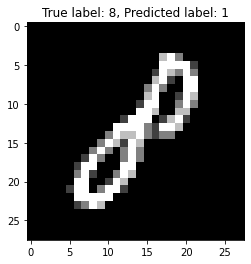

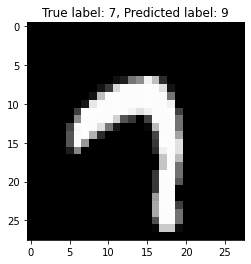

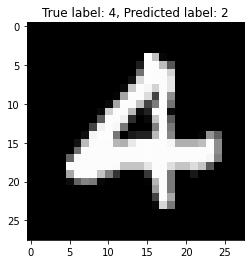

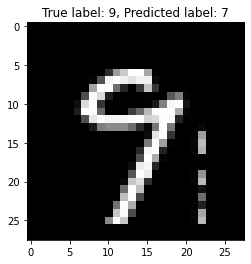

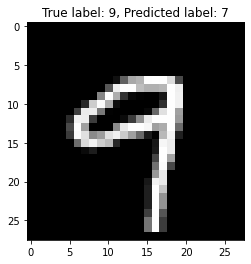

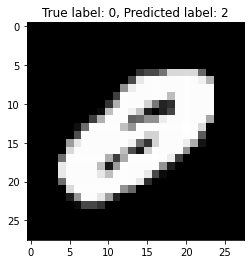

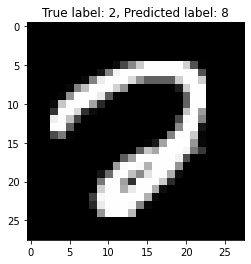

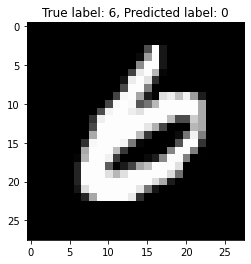

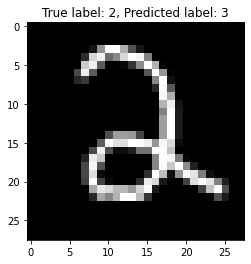

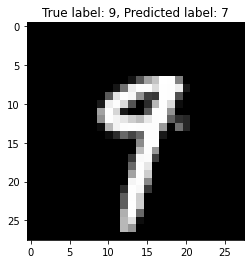

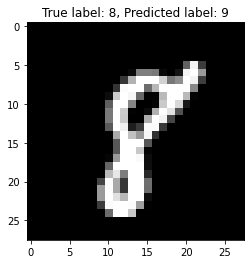

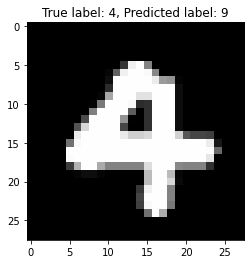

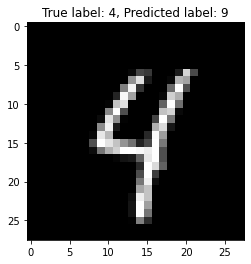

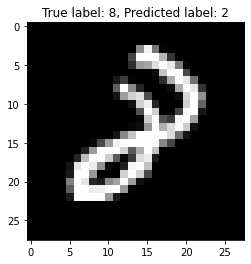

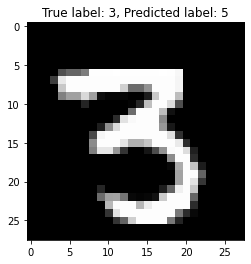

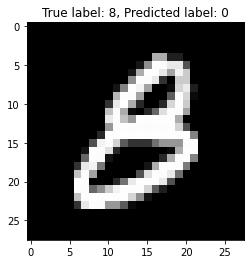

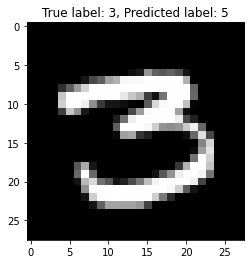

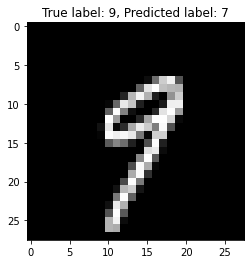

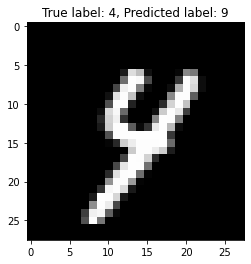

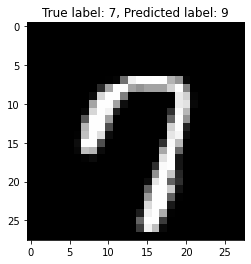

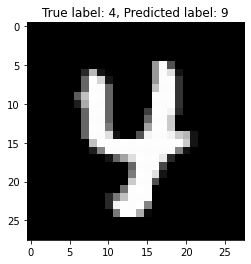

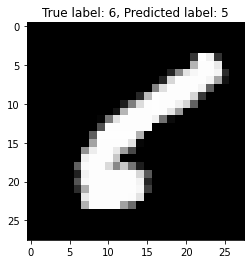

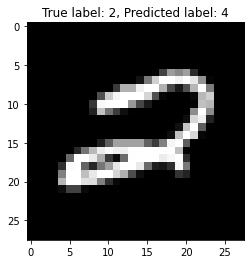

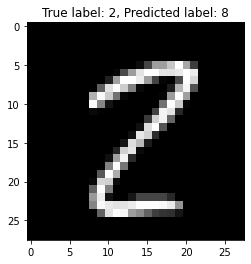

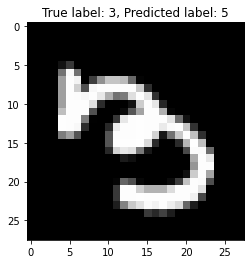

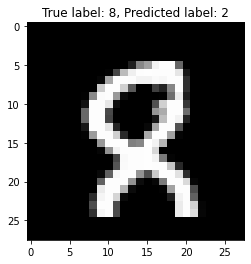

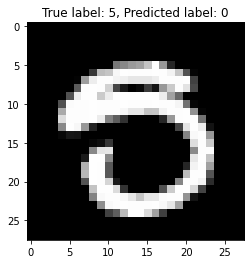

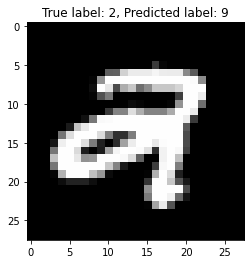

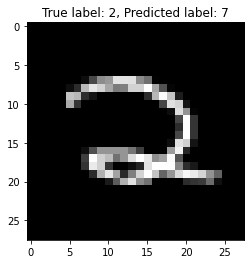

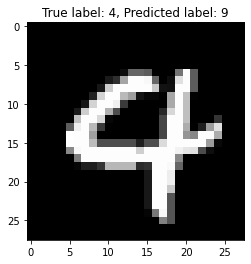

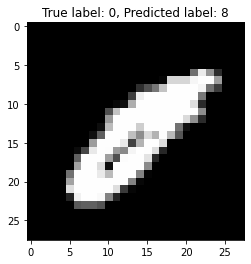

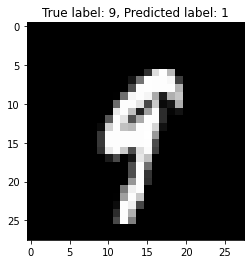

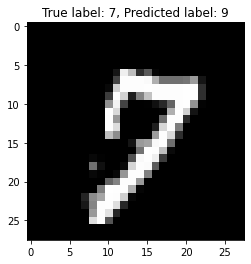

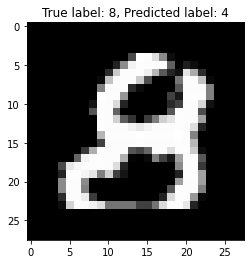

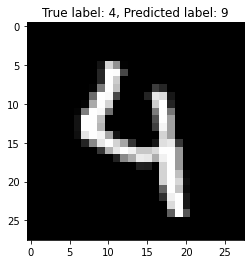

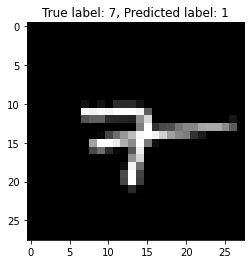

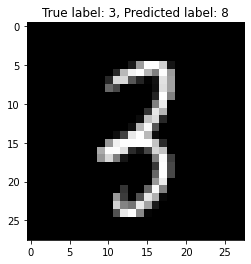

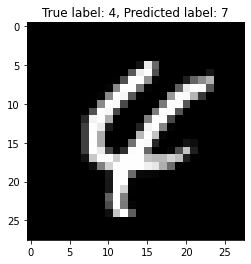

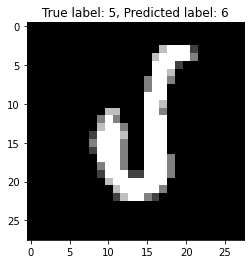

In [119]:
# Initialize a KNeighborsClassifier with n_neighbors=1
knn = KNeighborsClassifier(n_neighbors=1)

# Fit the model to the training data
knn.fit(mini_train_data, mini_train_labels)

# Evaluate the model on the dev data
dev_predictions = knn.predict(dev_data)
print("Accuracy on dev set:", knn.score(dev_data, dev_labels))

# Generate the confusion matrix
cm = confusion_matrix(dev_labels, dev_predictions)
print("Confusion Matrix:")
print(cm)

# Find all the misclassified digits
misclassified = [i for i in range(len(dev_data)) if dev_labels.values[i] != dev_predictions[i]]

# Plot the misclassified digits.  #Question-5 Part-4
for index in misclassified:
    plt.imshow(dev_data.values[index].reshape(28, 28), cmap='gray')
    plt.title("True label: %s, Predicted label: %s" % (dev_labels.values[index], dev_predictions[index]))
    plt.show()


References-

https://notebook.community/jbocharov-mids/W207-Machine-Learning/John_Bocharov_p1

https://www.google.com


5 ----- 6
4 ----- 7
3 -8
7 - 1
4 - 9
8 - 4
7 - 9
9 - 1
0 - 8
4 - 9
2 - 7
5 - 0
8 - 2
3 - 5
2 - 8
2 - 4
6 -5
4-9
7 - 9
4 - 9
9 - 7
3 - 5
8 - 0'
3 -5
8 - 2
4 - 9
4 - 9
8 - 9